# Combine Google Trends with other Time Series Data

# Introduction

[Google Trends](https://trends.google.com/trends/?geo=US) gives us an estimate of search volume. 

* What can the popularity of search terms tell us about the world? Google Trends gives us access to the popularity of Google Search terms. Let's investigate:

* How search volume for "Bitcoin" relates to the price of Bitcoin

* How search volume for a hot stock like Telsa relates to that stock's price and

* How searches for "Unemployment Benefits" vary with the actual unemployment rate in the United States

<img src='https://live.staticflickr.com/65535/52242126305_3521b71fca_h.jpg'>

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('data/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('data/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

I've already added the import statements and created the four different DataFrames in this notebook. Your first step is to explore the data, by getting an understanding of what's actually in those .csv files for this project.

Start with df_tesla, then have a look at df_unemployment and finally, check out the two bitcoin DataFrames.

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
df_tesla.shape

(145, 3)

In [4]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [5]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-07-01,9,3.988
1,2010-08-01,7,3.896
2,2010-09-01,7,4.082
3,2010-10-01,8,4.368
4,2010-11-01,8,7.066


In [6]:
df_tesla.tail()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
140,2022-03-01,80,1077.599976
141,2022-04-01,85,870.760010
142,2022-05-01,79,758.260010
143,2022-06-01,79,673.419983
144,2022-07-01,68,776.580017


In [7]:
print(f"Largest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].max()}")
print(f"Smallest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].min()}")

Largest value for Tesla in Web Search: 100
Smallest value for Tesla in Web Search: 7


In [8]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,145.000000,145.000000
mean,36.262069,162.941724
std,24.685809,280.784480
min,7.000000,3.896000
25%,17.000000,25.455999
50%,30.000000,48.174000
75%,49.000000,68.612000
max,100.000000,1144.760010


### Unemployment Data

In [9]:
df_unemployment.shape

(192, 3)

In [10]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,20,5.7
1,2004-02,17,5.6
2,2004-03,14,5.8
3,2004-04,14,5.6
4,2004-05,14,5.6


In [11]:
print("Largest value for 'Unemployemnt Benefits' "
      f"in Web Search: {df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()}")

Largest value for 'Unemployemnt Benefits' in Web Search: 100


### Bitcoin

In [12]:
df_btc_price.shape

(2869, 3)

In [13]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-18,424.440002,34483200.0
1,2014-09-19,394.795990,37919700.0
2,2014-09-20,408.903992,36863600.0
3,2014-09-21,398.821014,26580100.0
4,2014-09-22,402.152008,24127600.0


In [14]:
df_btc_search.shape

(95, 2)

In [15]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,6
1,2014-10,5
2,2014-11,4
3,2014-12,5
4,2015-01,7


In [16]:
print(f"largest BTC News Search: {df_btc_search['BTC_NEWS_SEARCH'].max()}")

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [17]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [18]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [19]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


In [20]:
df_btc_price[df_btc_price['CLOSE'].isna()]

,DATE,CLOSE,VOLUME
2868,2022-07-26,NaN,NaN


**Challenge**: Remove any missing values that you found. 

In [21]:
df_btc_price.dropna(inplace=True)

In [22]:
df_btc_price.isna().values.any()

False

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [23]:
type(df_tesla['MONTH'][0])

str

In [1]:
df_tesla

NameError: name 'df_tesla' is not defined

In [24]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])

In [25]:
df_tesla['MONTH'].head()

0   2010-07-01
1   2010-08-01
2   2010-09-01
3   2010-10-01
4   2010-11-01
Name: MONTH, dtype: datetime64[ns]

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [26]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

In [27]:
df_btc_monthly.shape

(95, 3)

# Data Visualisation

### Notebook Formatting & Style Helpers

In [28]:
# Create locators for ticks on the time axis

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

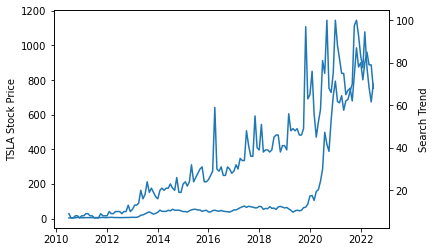

In [29]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price')
ax2.set_ylabel('Search Trend')

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'])
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'])

plt.show()

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [color names](https://matplotlib.org/stable/gallery/color/named_colors.html) for the search volume and a HEX code for a red color for the stock price. 
<br>
<br>
Hint: you can color both the [axis labels](https://matplotlib.org/stable/api/text_api.html) and the [lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html) on the chart using color keyword argument. 

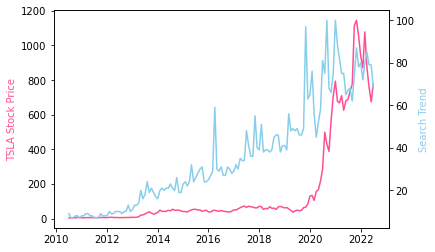

In [30]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#ff4d94')
ax2.set_ylabel('Search Trend', color='skyblue')

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='#ff4d94')
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], color='skyblue')

plt.show()

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

In [31]:
df_tesla['TSLA_USD_CLOSE'].max()

1144.76001

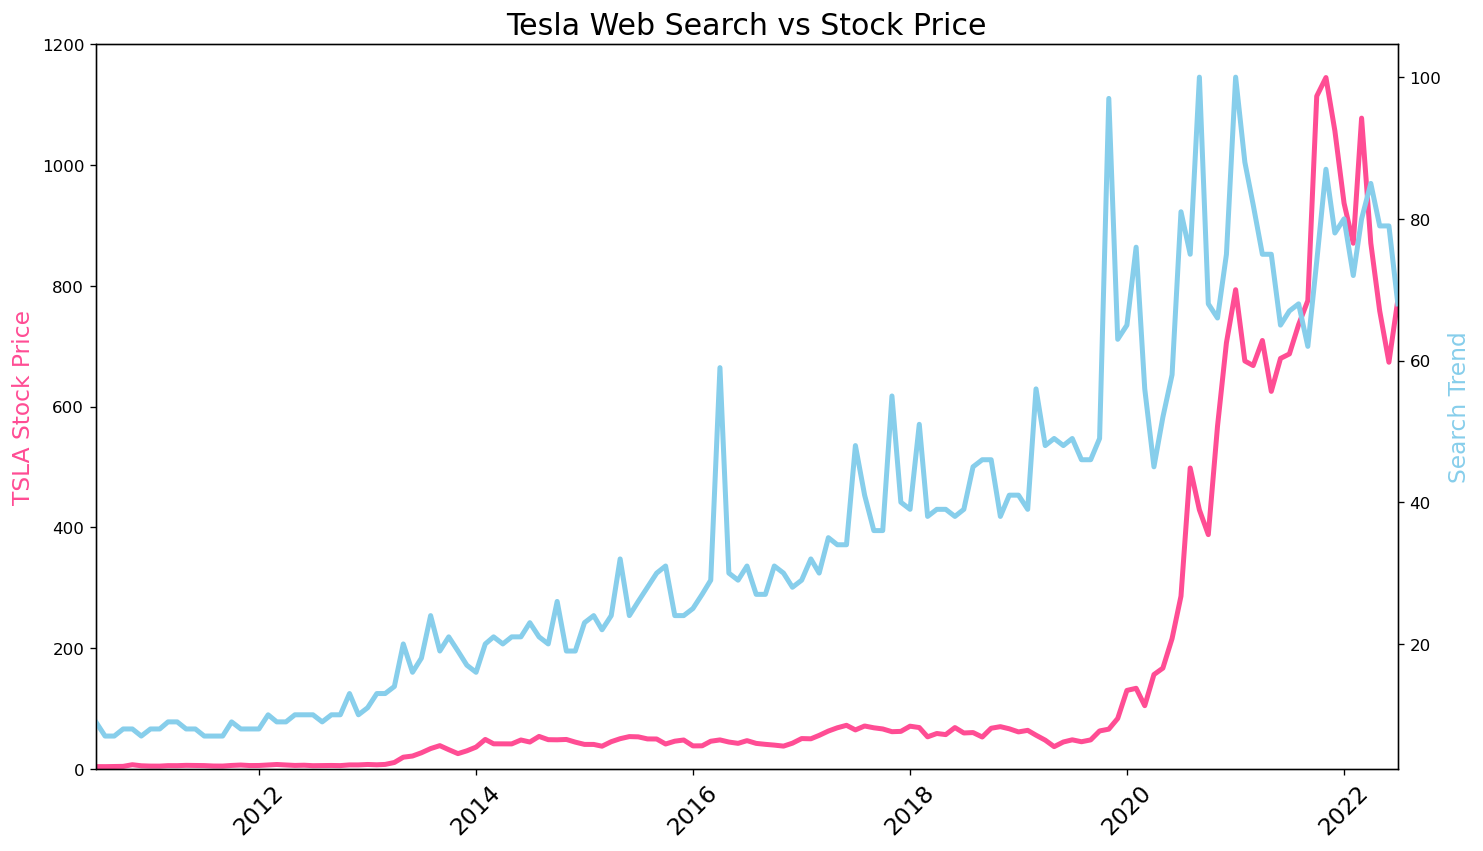

In [32]:
# increase figure size and resolution
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Tesla Web Search vs Stock Price', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#ff4d94', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.set_ylim(0, 1200)
ax1.set_xlim(df_tesla['MONTH'].min(), df_tesla['MONTH'].max())

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='#ff4d94', linewidth=3)
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], color='skyblue', linewidth=3)

plt.show()

How to add tick formatting for dates on the x-axis. 

In [47]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

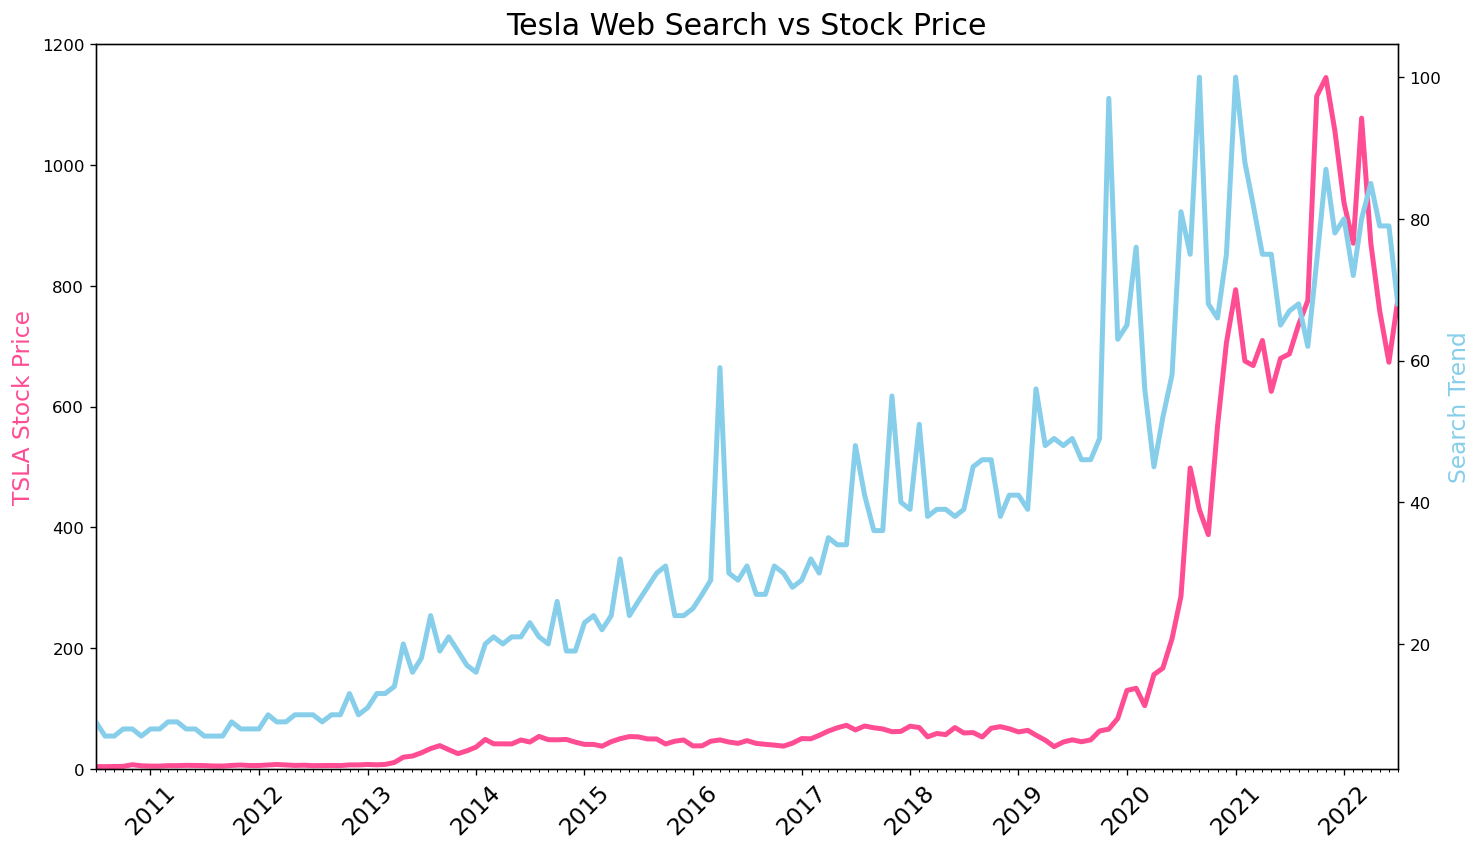

In [34]:
# increase figure size and resolution
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Tesla Web Search vs Stock Price', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)

ax1.set_ylabel('TSLA Stock Price', color='#ff4d94', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.set_ylim(0, 1200)
ax1.set_xlim(df_tesla['MONTH'].min(), df_tesla['MONTH'].max())

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='#ff4d94', linewidth=3)
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], color='skyblue', linewidth=3)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/stable/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

KeyError: 'DATE'

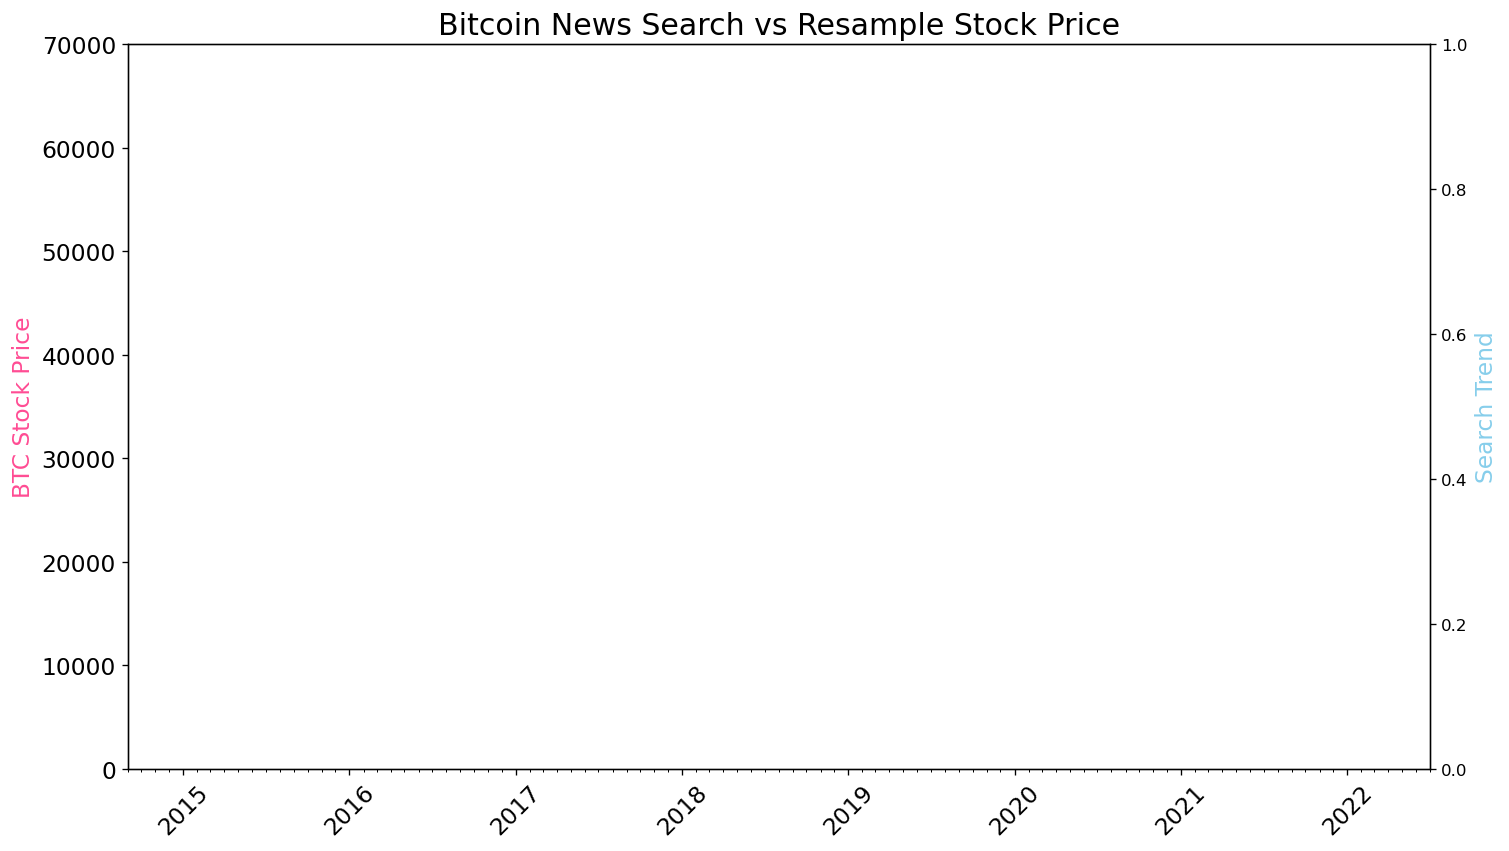

In [42]:
# increase figure size and resolution
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Bitcoin News Search vs Resample Stock Price', fontsize=18)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)

ax1.set_ylabel('BTC Stock Price', color='#ff4d94', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.set_ylim(0, 70000)
ax1.set_xlim(df_btc_search['MONTH'].min(), df_btc_search['MONTH'].max())

ax1.plot(df_unemployment['DATE'], df_btc_monthly['CLOSE'], color='#ff4d94', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly['DATE'], df_btc_search['BTC_NEWS_SEARCH'], color='skyblue', linewidth=3, marker='o')

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

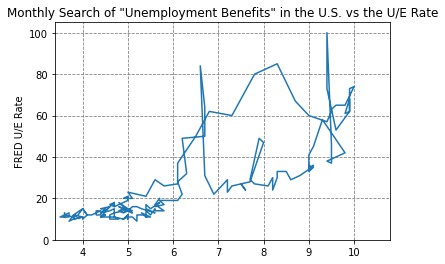

In [37]:
plt.plot(df_unemployment['UNRATE'], df_unemployment['UE_BENEFITS_WEB_SEARCH'])
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')
plt.ylabel('FRED U/E Rate')
plt.xlim(3.4, 10.8)
plt.ylim(0, 105)
plt.grid(color='grey',linestyle='--')
plt.show()

5. Can you discern any seasonality in the searches? Is there a pattern?

Overall, the higher of the unemployment rate, the higher of monthly Search of "Unemployment Benefits. 

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? 


In [36]:

rolling_mean = df_unemployment.UE_BENEFITS_WEB_SEARCH.rolling(6).mean()
rolling_mean


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
187    11.666667
188    11.666667
189    11.666667
190    11.833333
191    12.000000
Name: UE_BENEFITS_WEB_SEARCH, Length: 192, dtype: float64

In [38]:
df_unemployment.insert (3, "rolling_mean", rolling_mean)
df_unemployment

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE,rolling_mean
0,2004-01-01,20,5.7,NaN
1,2004-02-01,17,5.6,NaN
2,2004-03-01,14,5.8,NaN
3,2004-04-01,14,5.6,NaN
4,2004-05-01,14,5.6,NaN
...,...,...,...,...
187,2019-08-01,11,3.7,11.666667
188,2019-09-01,11,3.5,11.666667
189,2019-10-01,12,3.6,11.666667
190,2019-11-01,12,3.6,11.833333


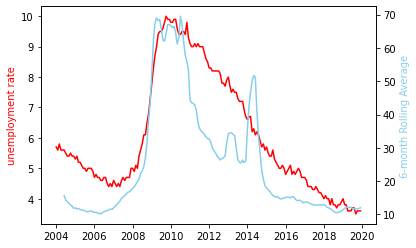

In [41]:
ax1 = plt.gca() 
ax2 = ax1.twinx()

ax1.set_ylabel('unemployment rate',color='red')
ax2.set_ylabel("6-month Rolling Average",color="skyblue")

ax1.plot(df_unemployment['MONTH'],df_unemployment["UNRATE"],color='red')
ax2.plot(df_unemployment['MONTH'],df_unemployment["rolling_mean"],color="skyblue")

plt.show()

The rolling mean does not always follow unemploymnet rate. There were some periods that the rolling mean is less or greater than the real unemployment rate.
From the year of 2008, the employment rate keeps rising until 2011, and slowly drops from 2011 to 2020. while rolling mean drops greatly in year 2011 and even become higher in year of 2014. 

### Including 2020-22 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-22.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [49]:
df_benefits = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-22.csv')
df_benefits

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,6,5.7
1,2004-02,5,5.6
2,2004-03,4,5.8
3,2004-04,4,5.6
4,2004-05,4,5.6
...,...,...,...
217,2022-02,5,3.8
218,2022-03,4,3.6
219,2022-04,4,3.6
220,2022-05,4,3.6


In [51]:
df_benefits['MONTH'] = df_benefits['MONTH'].astype('datetime64[ns]')

In [52]:
df_benefits.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,6,5.7
1,2004-02-01,5,5.6
2,2004-03-01,4,5.8
3,2004-04-01,4,5.6
4,2004-05-01,4,5.6


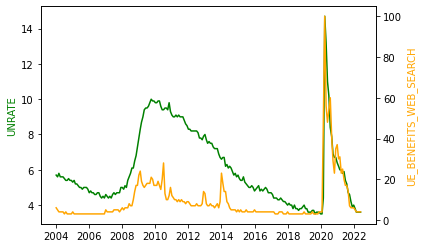

In [55]:
ax1 = plt.gca() 
ax2 = ax1.twinx()

ax1.set_ylabel('UNRATE',color='green')
ax2.set_ylabel("UE_BENEFITS_WEB_SEARCH",color="orange")

ax1.plot(df_benefits['MONTH'],df_benefits["UNRATE"],color='green')
ax2.plot(df_benefits['MONTH'],df_benefits["UE_BENEFITS_WEB_SEARCH"],color="orange")

plt.show()

The benefits search follows esactly same as the trend of unemployment. And it probably bacuase of covid-19, the unemployment rate and benefits search increase sharply between the year of 2020 and 2021, but it gradually drops now. 